In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [151]:
df = pd.read_csv('zomato.csv') 

In [152]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [153]:
df=df.drop(columns=['url','address','phone','menu_item','dish_liked','reviews_list'],axis=1)

In [154]:
df.drop_duplicates(inplace=True)

In [155]:
# Replace 'NEW', '-', and strings ending with '/5' with NaN
df['rate']=df['rate'].replace(['NEW','-'],np.nan).str.replace(r'\s*/5$','',regex=True)

In [156]:
# Convert 'rate' column to numeric, handling errors by setting non-numeric values to NaN
df['rate'] = pd.to_numeric(df['rate'], errors='coerce')

# Calculate the mean of the numeric values in the 'rate' column
rate_mean = df['rate'].mean()
# Fill NaN values in the 'rate' column with the calculated mean
df['rate']=df['rate'].fillna(rate_mean)

# Round the values in the 'rate' column to one decimal place
df['rate']=df['rate'].round(1)

In [157]:
df['rate'].isnull().sum()

0

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51609 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         51609 non-null  object 
 1   online_order                 51609 non-null  object 
 2   book_table                   51609 non-null  object 
 3   rate                         51609 non-null  float64
 4   votes                        51609 non-null  int64  
 5   location                     51588 non-null  object 
 6   rest_type                    51382 non-null  object 
 7   cuisines                     51564 non-null  object 
 8   approx_cost(for two people)  51265 non-null  object 
 9   listed_in(type)              51609 non-null  object 
 10  listed_in(city)              51609 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 4.7+ MB


In [159]:
df.dropna(inplace=True)

In [160]:
df.rename(columns={'approx_cost(for two people)' : 'cost2plate','listed_in(type)': 'Type','listed_in(city)': 'CIty'},inplace=True)

In [161]:
df.drop(columns=['CIty'], inplace=True)

In [162]:
# Remove commas from strings in the column
df['cost2plate']=df['cost2plate'].str.replace(',', '')

# Convert the values to integers
df['cost2plate']=pd.to_numeric(df['cost2plate'])

In [163]:
df['rest_type'].value_counts()

Quick Bites                   19010
Casual Dining                 10253
Cafe                           3682
Delivery                       2574
Dessert Parlor                 2242
                              ...  
Dessert Parlor, Kiosk             2
Food Court, Beverage Shop         2
Dessert Parlor, Food Court        2
Quick Bites, Kiosk                1
Sweet Shop, Dessert Parlor        1
Name: rest_type, Length: 93, dtype: int64

In [164]:
df['cost2plate'].unique()

array([ 800,  300,  600,  700,  550,  500,  450,  650,  400,  900,  200,
        750,  150,  850,  100, 1200,  350,  250,  950, 1000, 1500, 1300,
        199,   80, 1100,  160, 1600,  230,  130,   50,  190, 1700, 1400,
        180, 1350, 2200, 2000, 1800, 1900,  330, 2500, 2100, 3000, 2800,
       3400,   40, 1250, 3500, 4000, 2400, 2600,  120, 1450,  469,   70,
       3200,   60,  560,  240,  360, 6000, 1050, 2300, 4100, 5000, 3700,
       1650, 2700, 4500,  140], dtype=int64)

In [165]:
# Calculate value counts for the rest_type column
rest_type_counts = df['rest_type'].value_counts()

# Get categories with counts less than 1000
less_than_1000 = rest_type_counts[rest_type_counts < 1000].index

# Replace categories with counts less than 1000 with 'Other' in the DataFrame
df.loc[df['rest_type'].isin(less_than_1000), 'rest_type'] = 'Other'



In [166]:
df['rest_type'].value_counts()

Quick Bites           19010
Casual Dining         10253
Other                  9003
Cafe                   3682
Delivery               2574
Dessert Parlor         2242
Takeaway, Delivery     2008
Bakery                 1140
Casual Dining, Bar     1130
Name: rest_type, dtype: int64

In [167]:
#rest_types = df['rest_type'].value_counts(ascending  = False)
#rest_types_lessthan1000 = rest_types[rest_types<1000]

#def handle_rest_type(value):
#    if(value in rest_types_lessthan1000):
     #   return 'others'
#    else:
#        return value
        
#df['rest_type'] = df['rest_type'].apply(handle_rest_type)
#df['rest_type'].value_counts()

In [168]:
df['location'].value_counts()

BTM                      5056
HSR                      2494
Koramangala 5th Block    2479
JP Nagar                 2218
Whitefield               2105
                         ... 
West Bangalore              6
Yelahanka                   5
Jakkur                      3
Rajarajeshwari Nagar        2
Peenya                      1
Name: location, Length: 93, dtype: int64

In [169]:
# cleaning location column
location_count=df['location'].value_counts(ascending=False)
location_less_than300=location_count[location_count<300]
def handle_location(value):
    if(value in location_less_than300):
        return 'others'
    else:
        return value
df['location']=df['location'].apply(handle_location)

In [170]:
df['location'].value_counts()

BTM                      5056
others                   4954
HSR                      2494
Koramangala 5th Block    2479
JP Nagar                 2218
Whitefield               2105
Indiranagar              2026
Jayanagar                1916
Marathahalli             1805
Bannerghatta Road        1609
Bellandur                1268
Electronic City          1246
Koramangala 1st Block    1236
Brigade Road             1210
Koramangala 7th Block    1174
Koramangala 6th Block    1127
Sarjapur Road            1047
Koramangala 4th Block    1017
Ulsoor                   1011
Banashankari              902
MG Road                   893
Kalyan Nagar              841
Richmond Road             803
Malleshwaram              721
Frazer Town               714
Basavanagudi              684
Residency Road            671
Brookefield               656
New BEL Road              644
Banaswadi                 640
Kammanahalli              639
Rajajinagar               591
Church Street             566
Lavelle Ro

In [171]:
# cleaning cuisines column
df['cuisines'].unique()

array(['North Indian, Mughlai, Chinese', 'Chinese, North Indian, Thai',
       'Cafe, Mexican, Italian', ...,
       'North Indian, Street Food, Biryani', 'Chinese, Mughlai',
       'North Indian, Chinese, Arabian, Momos'], dtype=object)

In [172]:
df['cuisines'].value_counts()

North Indian                                2852
North Indian, Chinese                       2351
South Indian                                1820
Biryani                                      903
Bakery, Desserts                             898
                                            ... 
North Indian, Chinese, Oriya, Mithai           1
Beverages, Burger                              1
North Indian, Mughlai, Lucknowi                1
Continental, Thai, North Indian, Chinese       1
North Indian, Chinese, Arabian, Momos          1
Name: cuisines, Length: 2704, dtype: int64

In [173]:
cuisines_count=df['cuisines'].value_counts(ascending=False)
cuisines_less_than100=cuisines_count[cuisines_count<100]
def handle_cuisines(value):
    if (value in cuisines_less_than100 ):
        return 'others'
    else:
        return value
df['cuisines']= df['cuisines'].apply(handle_cuisines)

In [174]:
df['cuisines'].value_counts()

others                                 26159
North Indian                            2852
North Indian, Chinese                   2351
South Indian                            1820
Biryani                                  903
                                       ...  
South Indian, Chinese, North Indian      105
North Indian, Mughlai, Chinese           104
South Indian, Fast Food                  104
Italian, Pizza                           102
North Indian, Chinese, Seafood           102
Name: cuisines, Length: 70, dtype: int64

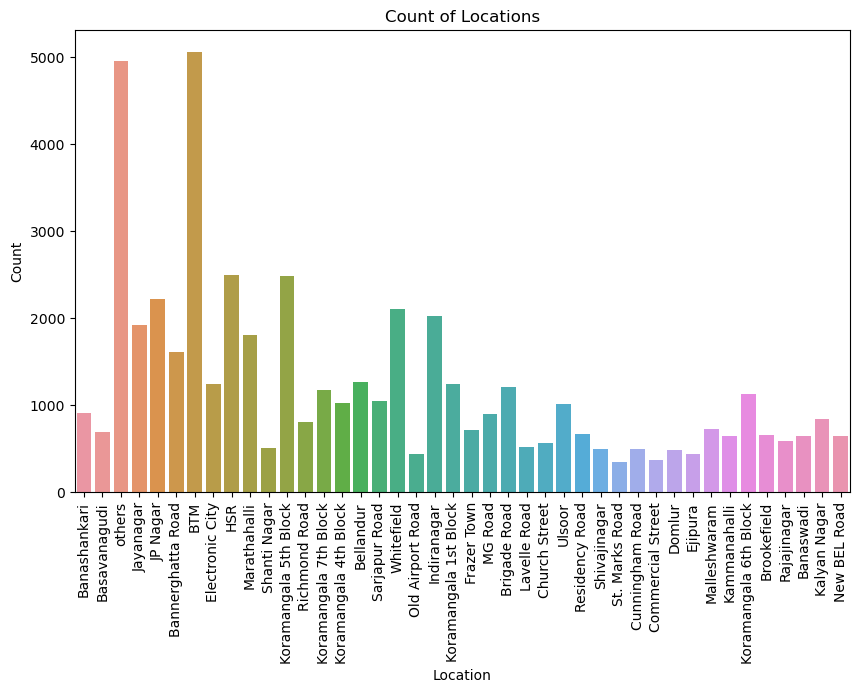

In [175]:
# Creating a count plot of various location
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
sns.countplot(data=df, x='location')
plt.title('Count of Locations')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

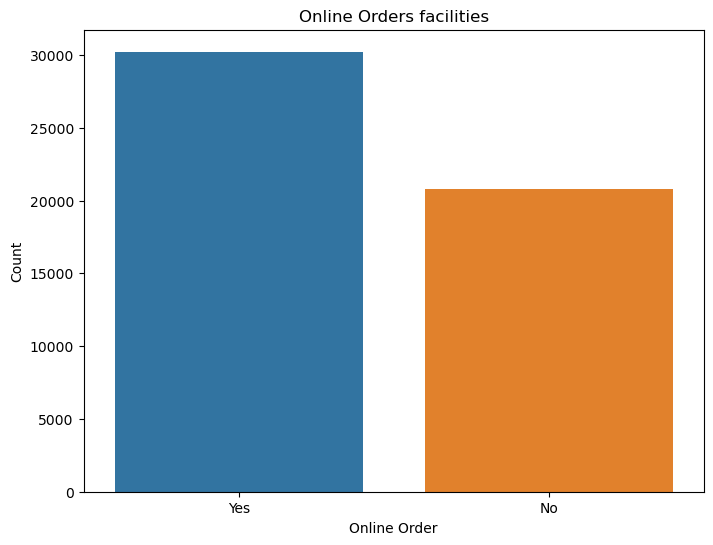

In [176]:

# Create a count plot for the 'online_order' column
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='online_order')
plt.title('Online Orders facilities')
plt.xlabel('Online Order')
plt.ylabel('Count')
plt.show()

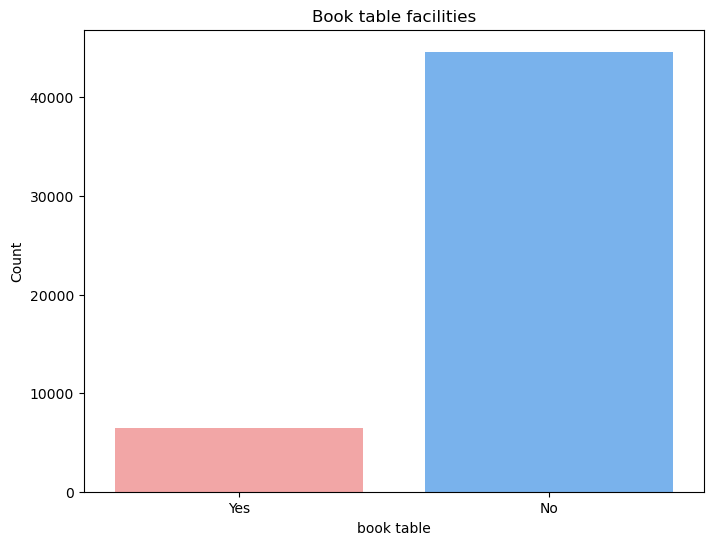

In [177]:

# Create a count plot for the 'book_table' column
plt.figure(figsize=(8, 6))
custom_colors = ['#FF9999', '#66B2FF'] 
sns.countplot(data=df, x='book_table', palette=custom_colors)
plt.title('Book table facilities')
plt.xlabel('book table')
plt.ylabel('Count')
plt.show()

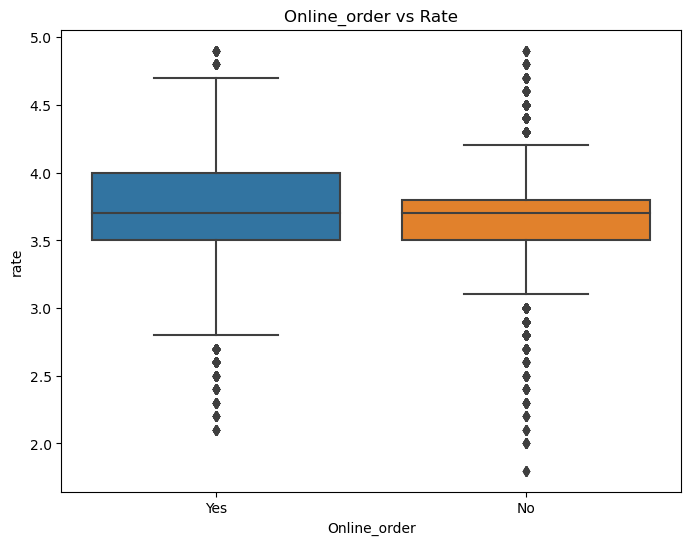

In [178]:

# Online order vs Rate

plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='online_order', y='rate')
plt.title('Online_order vs Rate')
plt.xlabel('Online_order')
plt.ylabel('rate')
plt.show()

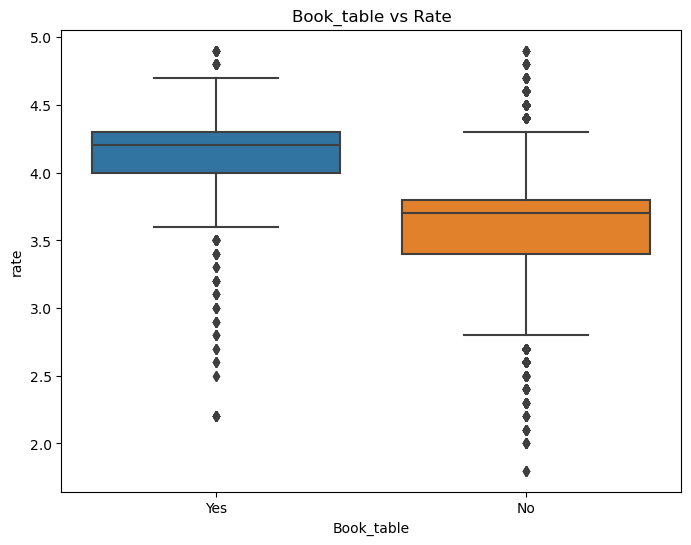

In [179]:
# Book_table vs Rate

plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='book_table', y='rate')
plt.title('Book_table vs Rate')
plt.xlabel('Book_table')
plt.ylabel('rate')
plt.show()

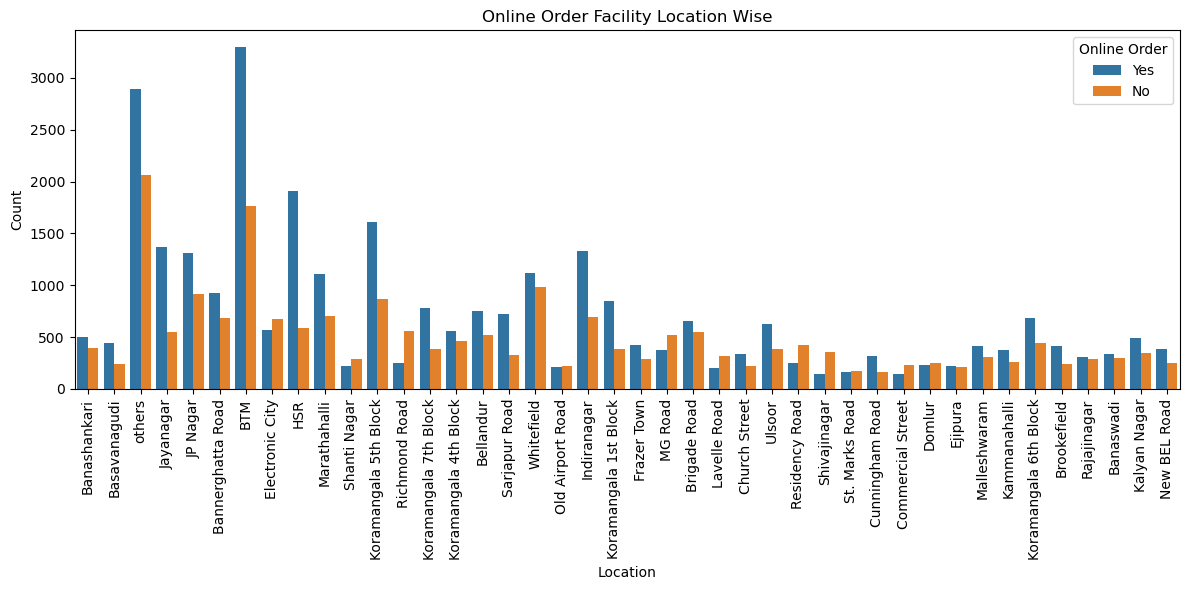

In [180]:
# Online Order Facility Location Wise

# Set the figure size
plt.figure(figsize=(12, 6))

# Create the count plot
sns.countplot(data=df, x='location', hue='online_order')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Add title and labels
plt.title('Online Order Facility Location Wise')
plt.xlabel('Location')
plt.ylabel('Count')

# Show the plot
plt.legend(title='Online Order', labels=['Yes','No'])  # Add legend with appropriate labels
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()



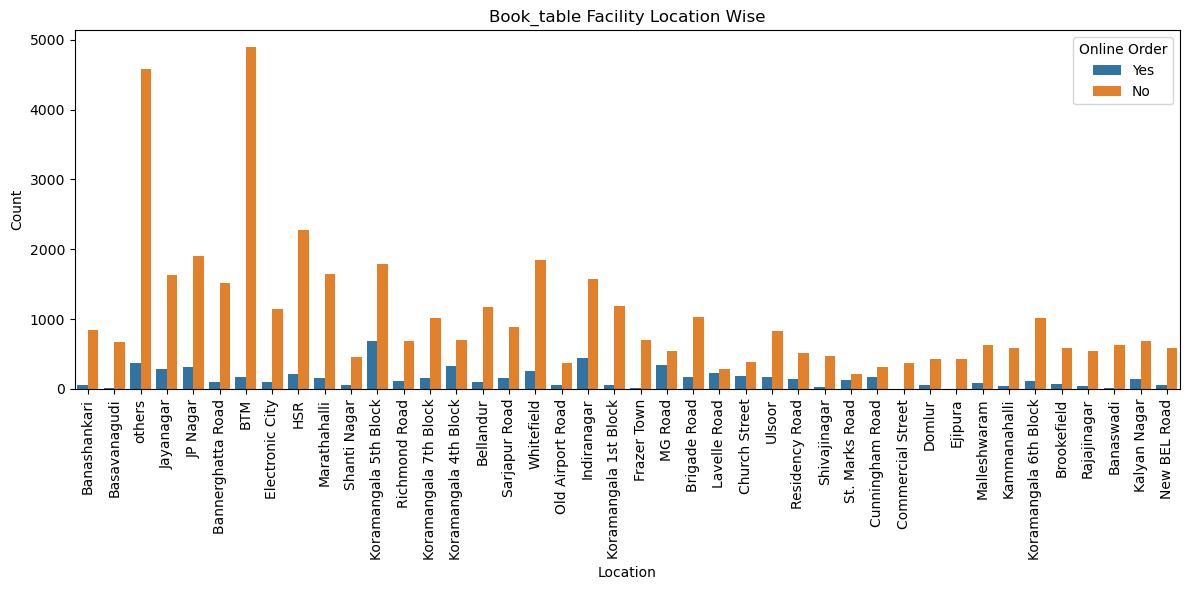

In [181]:
# Book_table Facility Location Wise

# Set the figure size
plt.figure(figsize=(12, 6))

# Create the count plot
sns.countplot(data=df, x='location', hue='book_table')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Add title and labels
plt.title('Book_table Facility Location Wise')
plt.xlabel('Location')
plt.ylabel('Count')

# Show the plot
plt.legend(title='Online Order', labels=['Yes','No'])  # Add legend with appropriate labels
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

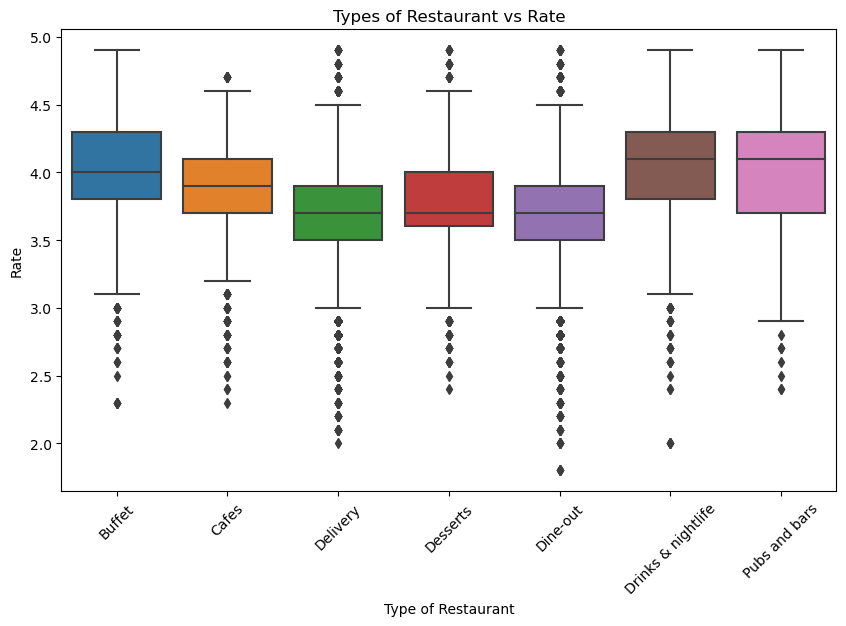

In [182]:
# Types od restaurant vs rate

# Set the figure size
plt.figure(figsize=(10, 6))

# Create the box plot
sns.boxplot(data=df, x='Type', y='rate')

# Add title and labels
plt.title('Types of Restaurant vs Rate')
plt.xlabel('Type of Restaurant')
plt.ylabel('Rate')

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [183]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost2plate,Type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,others,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,Other,others,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,others,600,Buffet


In [190]:

# Step 1: Group by 'location' and 'type' columns and count occurrences
df1 = df.groupby(['location', 'Type'])['name'].count()

# Step 2: Save the DataFrame to a CSV file
df1.to_csv('location_Type.csv')

# Step 3: Read the CSV file back into a DataFrame
df1 = pd.read_csv('location_Type.csv')

# Step 4: Pivot the DataFrame to reshape the data
df1 = pd.pivot_table(df1, values=None, index=['location'], columns=['Type'], fill_value=0, aggfunc=np.sum)
df1

name                                   \
Type                  Buffet Cafes Delivery Desserts Dine-out   
location                                                        
BTM                       21    83     3053      198     1660   
Banashankari               7    36      418       71      356   
Banaswadi                  0    24      310       37      262   
Bannerghatta Road          9    46      828      137      578   
Basavanagudi               7    11      344       66      251   
Bellandur                 28    36      617       75      479   
Brigade Road              25    46      497      108      455   
Brookefield                6    17      339       45      245   
Church Street             19    51      193       29      215   
Commercial Street          0    13      121       77      159   
Cunningham Road           29    34      194       26      184   
Domlur                    15    13      261       35      135   
Ejipura                    0     0      245       16      172   
Electronic City           23    24      570       71      516   
Frazer Town                1    11      470       56      172   
HSR                       19    49     1694      120      580   
Indiranagar               38    97     1091      140      529   
JP Nagar                  45    76     1151      166      722   
Jayanagar                 27    77     1043      182      575   
Kalyan Nagar               9    45      366       88      315   
Kammanahalli               2    27      329       35      240   
Koramangala 1st Block      3    26      716       70      398   
Koramangala 4th Block     21    53      464       81      302   
Koramangala 5th Block     65   146     1075      209      842   
Koramangala 6th Block     18    43      511       70      411   
Koramangala 7th Block     25    52      503      127      417   
Lavelle Road              30    27      127       50      191   
MG Road                   51    76      266       68      343   
Malleshwaram              11    31      269       85      291   
Marathahalli              34    32      980      105      630   
New BEL Road               4    29      338       33      224   
Old Airport Road          12     5      200       35      164   
Rajajinagar               10     4      258       55      251   
Residency Road            20    31      187       63      289   
Richmond Road             63    21      257       78      356   
Sarjapur Road             25    22      558       82      319   
Shanti Nagar               9    22      198       39      229   
Shivajinagar               6    17      143       37      280   
St. Marks Road             5    10      111       10      145   
Ulsoor                    16    56      456       71      359   
Whitefield                28    51     1041      137      768   
others                    83   133     2787      276     1553   

                                                        
Type                  Drinks & nightlife Pubs and bars  
location                                                
BTM                                   22            19  
Banashankari                          14             0  
Banaswadi                              6             1  
Bannerghatta Road                      9             2  
Basavanagudi                           5             0  
Bellandur                             17            16  
Brigade Road                          57            22  
Brookefield                            4             0  
Church Street                         36            23  
Commercial Street                      0             0  
Cunningham Road                       16             7  
Domlur                                12            11  
Ejipura                                0             0  
Electronic City                       21            21  
Frazer Town                            2             2  
HSR                                   14            18  
Indiranagar    

<Figure size 1500x600 with 0 Axes>

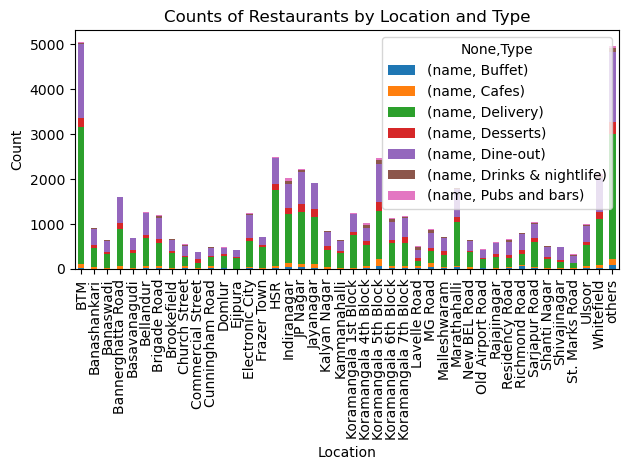

In [193]:
# Tpes of restaurant location wise

# Plot the pivoted DataFrame using a bar plot
plt.figure(figsize=(15, 6))
df1.plot(kind='bar', stacked=True)
plt.title('Counts of Restaurants by Location and Type')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

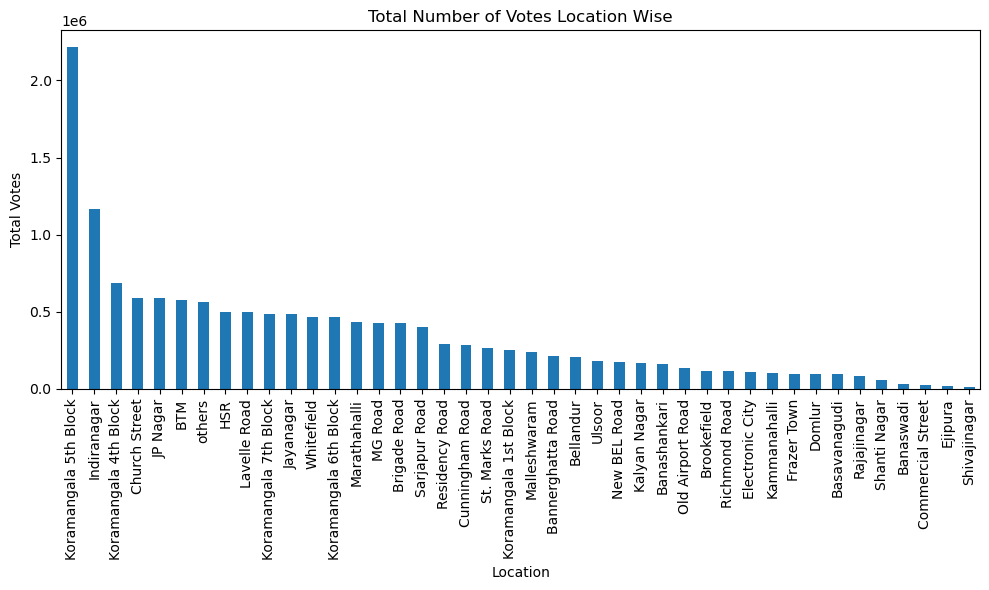

In [213]:
# total votes loccation wise
plt.figure(figsize=(10, 6))
# Sort the votes_location_wise Series in descending order
votes_location_wise_sorted = votes_location_wise.sort_values(ascending=False)
votes_location_wise_sorted.plot(kind='bar')
plt.title('Total Number of Votes Location Wise')
plt.xlabel('Location')
plt.ylabel('Total Votes')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [225]:
 df6 = df[['cuisines', 'votes']]
df6.drop_duplicates()
df7 = df6.groupby(['cuisines'])['votes'].sum()
df7 = df7.to_frame()
df7 = df7.sort_values('votes', ascending=False)
df7.head()

,votes
cuisines,
others,11542182
North Indian,516310
"North Indian, Chinese",258225
South Indian,161975
"North Indian, Mughlai",103706


In [226]:
df7 = df7.iloc[1:, :]
df7.head()

,votes
cuisines,
North Indian,516310
"North Indian, Chinese",258225
South Indian,161975
"North Indian, Mughlai",103706
Chinese,101728


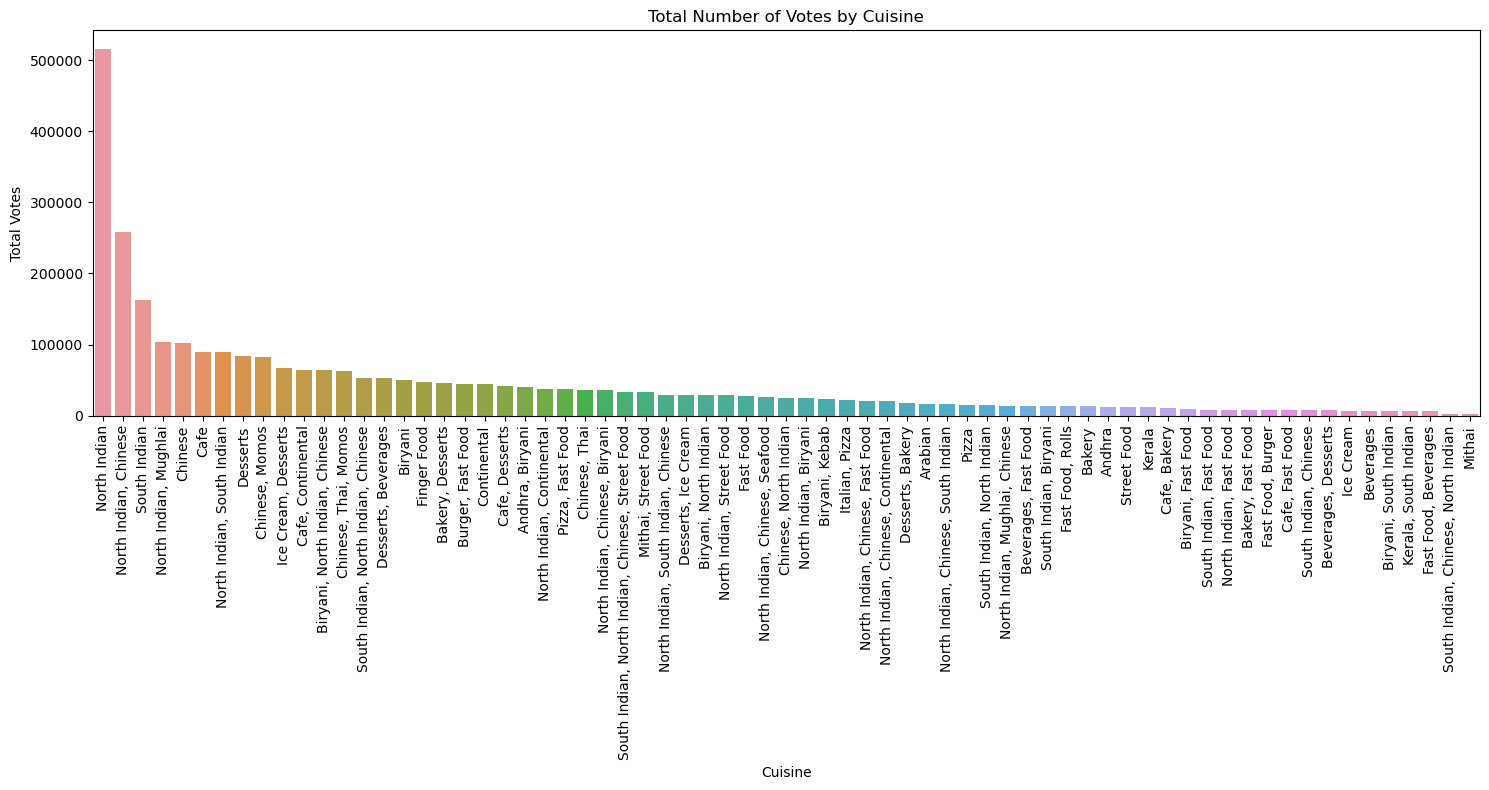

In [228]:
plt.figure(figsize=(15, 8))
sns.barplot(x=df7.index, y=df7['votes'])
plt.xticks(rotation=90)
plt.title('Total Number of Votes by Cuisine')
plt.xlabel('Cuisine')
plt.ylabel('Total Votes')
plt.tight_layout()
plt.show()